<a href="https://colab.research.google.com/github/younhuiji/openCV/blob/main/CV07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Q2)숫자 데이터 다운로드 받아 구현해보자.

import cv2, numpy as np
import pickle, gzip, os
from urllib.request import urlretrieve
import matplotlib.pyplot as plt


#2-1
def load_mnist(filename):
    if not os.path.exists(filename):
        print("Downloading" )
        link = "http://figshare.com/ndownloader/files/25635053"
        urlretrieve(link, filename)
    with gzip.open(filename, 'rb') as f:
        return pickle.load(f, encoding='latin1')



In [ ]:
#Q1) K-Nearest Neighbor
import numpy as np, cv2

def draw_points(image, group, color):
    for p in group:
        pt = tuple(p.astype(int))
        cv2.circle(image, pt, 3, color, cv2.FILLED)

nsample = 50
traindata = np.zeros((nsample*2, 2), np.float32)  # 학습 데이터 행렬
label = np.zeros((nsample*2, 1), np.float32)   # 레이블

cv2.randn(traindata[:nsample], 150, 30)
cv2.randn(traindata[nsample:], 250, 60)
label[:nsample], label[nsample:] = 0 , 1

K = 7
knn = cv2.ml.KNearest_create()  # kNN 클래스로 객체 생성
knn.train(traindata, cv2.ml.ROW_SAMPLE, label)  # 학습 수행

points = [(x, y) for y in range(400) for x in range(400)  ]
ret, resp, neig, dist = knn.findNearest(np.array(points, np.float32), K)  # 분류 수행

colors = [(0, 180, 0) if p==1 else  (0, 0, 180) for p in resp]
image = np.reshape(colors, (400,400,3)).astype("uint8")

draw_points(image, traindata[:nsample], color=(0, 0, 255))
draw_points(image, traindata[nsample:], color=(0, 255, 0))
cv2.imshow("sample K="+ str(K), image)
cv2.waitKey(0)


-1

In [ ]:
#2-2
train_set, valid_set, test_set = load_mnist('mnist.pkl.gz')
train_data, train_label = train_set
test_data, test_label = test_set

#2-3
## MNIST 로드 데이터 크기 확인
print('train_set=', train_set[0].shape)
print('valid_set', valid_set[0].shape)
print('test_set', test_set[0].shape)

train_set= (50000, 784)
valid_set (10000, 784)
test_set (10000, 784)


In [ ]:
#2-4
print('training...')
knn = cv2.ml.KNearest_create()
knn.train(train_data, cv2.ml.ROW_SAMPLE, train_label)               # k-NN 학습 수행


training...


True

100개 predicting...
정확도= 98.0 %


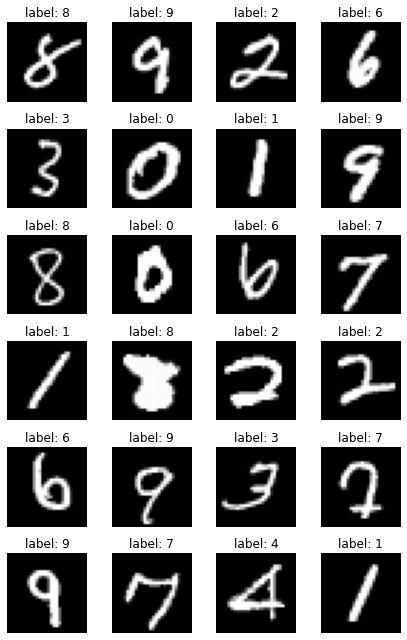

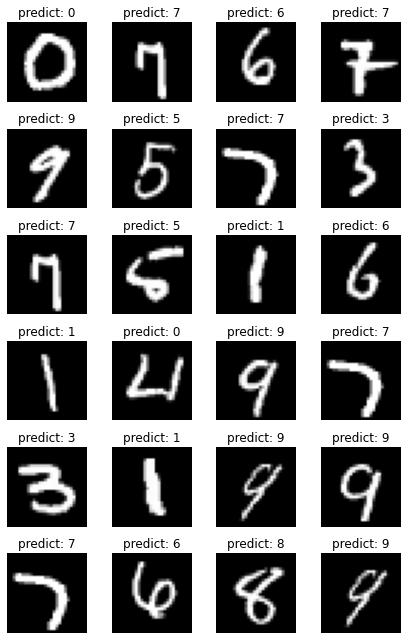

In [ ]:
#2-5
nsample = 100
print("%d개 predicting..." % nsample)
_, resp, _ , _ = knn.findNearest(test_data[:nsample], k=5)            # k-NN 분류 수행
accur = sum(test_label[:nsample] == resp.flatten()) / len(resp)       # 성능 측정
print("정확도=", accur*100, '%')

#2-6
#그래프 연동
def graph_image(data, lable, title, nsample):
    plt.figure(num=title, figsize=(6, 9))
    rand_idx = np.random.choice(range(data.shape[0]), nsample)
    for i, id in enumerate(rand_idx):
        img = data[id].reshape(28, 28)
        plt.subplot(6, 4, i + 1), plt.axis('off'), plt.imshow(img, cmap='gray')
        plt.title('%s: %d' % (title , lable[id]))
    plt.tight_layout()

graph_image(train_data, train_label, 'label', 24)                   # 학습 데이터 그리기
graph_image(test_data[:nsample], resp, 'predict', 24)
plt.show()